### 1. Realice la búsqueda de un conjunto de datos de mínimo 1000 registros, donde pueda obtener información correspondiente al sector asignado y al cual se le pueda aplicar el método de RBNN.

https://www.kaggle.com/datasets/veeralakrishna/predict-demand?resource=download

In [28]:
pip install pandas

In [29]:
import pandas as pd
df = pd.read_csv("test.csv")

###  2. Realice la lectura del banco de datos e imprima las categorías que tiene y cuales son las variables dependientes e independientes.

#### Categorías

In [30]:
for columna in df.columns:
    print(f"Categorías,'{columna}'")

Categorías,'id'
Categorías,'date'
Categorías,'city'
Categorías,'lat'
Categorías,'long'
Categorías,'pop'
Categorías,'shop'
Categorías,'brand'
Categorías,'container'
Categorías,'capacity'
Categorías,'price'
Categorías,'quantity'


In [31]:
variables_independientes = df.drop(['container'], axis=1)
variable_dependiente = df['container']

print("\nVariables independientes:")
print(variables_independientes.head(2))

print("\nVariable dependiente:")
print(variable_dependiente.head(2))


Variables independientes:
     id      date    city       lat      long     pop    shop        brand  \
0  6480  31/01/18  Athens  37.97945  23.71622  664046  shop_1  kinder-cola   
1  6481  31/01/18  Athens  37.97945  23.71622  664046  shop_1  kinder-cola   

  capacity  price  quantity  
0    1.5lt   3.10      7056  
1    330ml   0.85     12490  

Variable dependiente:
0    plastic
1        can
Name: container, dtype: object


En k-means y te da esa clasificación por neurona
y también se ajusta por peso  de acuerdoo a la salida.
Calcular la salida de las neuronas


Base radial

##3. Realice el proceso de limpieza de los datos, jus�ficando cada una de las etapas u�lizadas.

In [32]:
import pandas as pd
import re
from unicodedata import normalize

# Función de limpieza de texto
def limpieza(texto):
  texto = str(texto) #Garantizar que todas las celdas contengan strings
  texto = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD",texto), 0, re.I) #Eliminar diacríticos
  texto = re.sub('(f|ht)tp(s?)://(.*)[.][a-z]+[/][a-z]+',' ',texto) #Borrar urls
  texto= re.sub('[a-zA-Z0-9.?{}]+@\w+\.\w+.\w*','',texto) #Eliminar correos electrónicos
  texto= re.sub('[^a-zA-Z_á\éíóúà\èìòùäëïöü\s]','',texto) #Eliminar letras de alfabetos extraños
  return texto.lower() #Convertir a minuscula y retornar todo el proceso

In [33]:
df["containerClean"] = df["container"].apply(limpieza)
#tabla["lematizados"] = tabla["tweetsLimpios"].apply(lemmatizar)
df.sample(10)

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,containerClean
547,7027,31/07/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,can,330ml,0.48,65070,can
971,7451,30/11/18,Larisa,39.63689,22.41761,144651,shop_5,lemon-boost,glass,500ml,0.79,18436,glass
794,7274,30/09/18,Larisa,39.63689,22.41761,144651,shop_5,orange-power,can,330ml,0.59,27716,can
704,7184,31/08/18,Athens,37.96245,23.68708,664046,shop_3,lemon-boost,plastic,1.5lt,1.85,18629,plastic
607,7087,31/07/18,Larisa,39.63689,22.41761,144651,shop_5,kinder-cola,can,330ml,0.49,28235,can
933,7413,30/11/18,Patra,38.24444,21.73444,168034,shop_6,gazoza,can,330ml,0.35,70189,can
349,6829,30/04/18,Irakleion,35.32787,25.14341,137154,shop_2,gazoza,can,330ml,0.28,81658,can
140,6620,28/02/18,Athens,37.96245,23.68708,664046,shop_3,kinder-cola,glass,500ml,1.49,6604,glass
417,6897,31/05/18,Athens,37.96245,23.68708,664046,shop_3,gazoza,plastic,1.5lt,0.89,35827,plastic
412,6892,31/05/18,Athens,NaN,NaN,664046,shop_3,adult-cola,can,330ml,0.74,27071,can


##4. Para el caso de datos nulos o no válidos, realice el análisis de cuál es el mejor procedimiento para realizar el tratamiento de esos datos y jus�fique cada uno de los procedimientos u�lizados.

In [34]:
values_null = df.isnull().sum()
values_null

id                 0
date               0
city               0
lat                8
long              13
pop                0
shop               0
brand              0
container          3
capacity           4
price              0
quantity           0
containerClean     0
dtype: int64

Basado, en que hay varias columnas con valores nulos:


Latitud y longitud: Las coordenadas de latitud y longitud pueden ser muy sensibles a valores atípicos y errores de medición. Utilizar la mediana para imputar los valores nulos en estas columnas puede ayudar a evitar que valores extremos distorsionen la ubicación geográfica general.

Capacidad y precio: Las columnas "capacity" y "price" también parecen tener valores atípicos. Imputar valores nulos en estas columnas con la mediana permitirá que el modelo capture mejor la tendencia central de estos atributos sin ser influenciado en exceso por valores extremos

En resumen, dada la distribución de  datos y la sensibilidad a valores atípicos en varias columnas, la imputación con la mediana puede ser una estrategia efectiva para tratar los valores nulos.






In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1080 non-null   int64  
 1   date            1080 non-null   object 
 2   city            1080 non-null   object 
 3   lat             1072 non-null   float64
 4   long            1067 non-null   float64
 5   pop             1080 non-null   int64  
 6   shop            1080 non-null   object 
 7   brand           1080 non-null   object 
 8   container       1077 non-null   object 
 9   capacity        1076 non-null   object 
 10  price           1080 non-null   float64
 11  quantity        1080 non-null   int64  
 12  containerClean  1080 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 109.8+ KB


In [36]:

import pandas as pd
import re

# Función para convertir unidades de medida a valores numéricos
def convert_to_numeric(value):
    if isinstance(value, str):
        match = re.search(r'(\d+(\.\d+)?)', value)
        if match:
            return float(match.group(1))
    return value


In [37]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,containerClean
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,7056,plastic
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,12490,can
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,26640,glass
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,41892,glass
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,22923,plastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,13760,plastic
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,16309,plastic
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,24378,can
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5lt,2.17,20691,plastic


In [38]:

# Conversión de unidades en las columnas "capacity" y "price"
df['capacity'] = df['capacity'].apply(convert_to_numeric)
df['price'] = df['price'].apply(convert_to_numeric)


In [39]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,containerClean
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5,3.10,7056,plastic
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330.0,0.85,12490,can
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500.0,0.83,26640,glass
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500.0,0.54,41892,glass
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5,0.83,22923,plastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5,2.52,13760,plastic
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5,2.18,16309,plastic
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330.0,0.85,24378,can
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5,2.17,20691,plastic


In [40]:
import numpy as np

# Imputación de valores nulos con la mediana y conversión de unidades
columns_to_impute = ['lat', 'long', 'capacity', 'price']
for column in np.array(columns_to_impute)  :
     median_value = df[column].median()
     df[column].fillna(median_value, inplace=True)

In [41]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,containerClean
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5,3.10,7056,plastic
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330.0,0.85,12490,can
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500.0,0.83,26640,glass
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500.0,0.54,41892,glass
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5,0.83,22923,plastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5,2.52,13760,plastic
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5,2.18,16309,plastic
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330.0,0.85,24378,can
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5,2.17,20691,plastic


In [42]:
values_null = df.isnull().sum()
values_null

id                0
date              0
city              0
lat               0
long              0
pop               0
shop              0
brand             0
container         3
capacity          0
price             0
quantity          0
containerClean    0
dtype: int64

Dado que solo tres valores son nulos en un conjunto de 1000, la eliminación de estos tres puntos tendrá un impacto mínimo en el tamaño total del conjunto de datos. En términos generales, el impacto en la precisión y la representatividad de tus resultados será pequeño.

In [43]:
# Eliminar las filas con valores nulos en el DataFrame original
df.dropna(subset=['container'], inplace=True)

In [44]:
values_null = df.isnull().sum()
values_null

id                0
date              0
city              0
lat               0
long              0
pop               0
shop              0
brand             0
container         0
capacity          0
price             0
quantity          0
containerClean    0
dtype: int64

In [45]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,containerClean
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5,3.10,7056,plastic
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330.0,0.85,12490,can
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500.0,0.83,26640,glass
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500.0,0.54,41892,glass
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5,0.83,22923,plastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5,2.52,13760,plastic
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5,2.18,16309,plastic
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330.0,0.85,24378,can
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5,2.17,20691,plastic


##5. Realice un análisis de correlación y determine cuales de las variables del conjunto de datos �ene correlación con la variable obje�vo, jus�fique su respuesta.

El objetivo de estas transformaciones es proporcionar al algoritmo k-means una representación numérica de las características categóricas.

In [46]:
df['containerNumeric'] = pd.factorize(df['containerClean'])[0]
df['cityNumeric'] = pd.factorize(df['city'])[0]
df['brandNumeric'] = pd.factorize(df['brand'])[0]

df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity,containerClean,containerNumeric,cityNumeric,brandNumeric
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5,3.10,7056,plastic,0,0,0
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330.0,0.85,12490,can,1,0,0
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500.0,0.83,26640,glass,2,0,1
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500.0,0.54,41892,glass,2,0,2
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5,0.83,22923,plastic,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5,2.52,13760,plastic,0,0,0
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5,2.18,16309,plastic,0,0,2
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330.0,0.85,24378,can,1,2,0
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5,2.17,20691,plastic,0,3,1


In [47]:
df_corr = df.corr()
df_corr

<ipython-input-47-0c96883f2151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,id,lat,long,pop,capacity,price,quantity,containerNumeric,cityNumeric,brandNumeric
id,1.000000,0.025915,-0.012908,-0.007823,-0.006225,-0.013253,0.096649,-0.005157,0.029268,0.009908
lat,0.025915,1.000000,-0.714042,0.078917,-0.002280,0.029554,-0.034882,-0.001846,0.627511,0.002064
long,-0.012908,-0.714042,1.000000,0.207725,0.001823,-0.016496,-0.131683,0.001405,-0.573784,-0.003079
pop,-0.007823,0.078917,0.207725,1.000000,-0.000557,0.001607,-0.228473,-0.000483,-0.698592,-0.003502
capacity,-0.006225,-0.002280,0.001823,-0.000557,1.000000,-0.653198,0.244460,0.982706,-0.000845,0.000170
price,-0.013253,0.029554,-0.016496,0.001607,-0.653198,1.000000,-0.516422,-0.560533,0.020698,-0.262444
quantity,0.096649,-0.034882,-0.131683,-0.228473,0.244460,-0.516422,1.000000,0.197912,0.077707,0.209683
containerNumeric,-0.005157,-0.001846,0.001405,-0.000483,0.982706,-0.560533,0.197912,1.000000,-0.000510,0.000001
cityNumeric,0.029268,0.627511,-0.573784,-0.698592,-0.000845,0.020698,0.077707,-0.000510,1.000000,0.003674
brandNumeric,0.009908,0.002064,-0.003079,-0.003502,0.000170,-0.262444,0.209683,0.000001,0.003674,1.000000


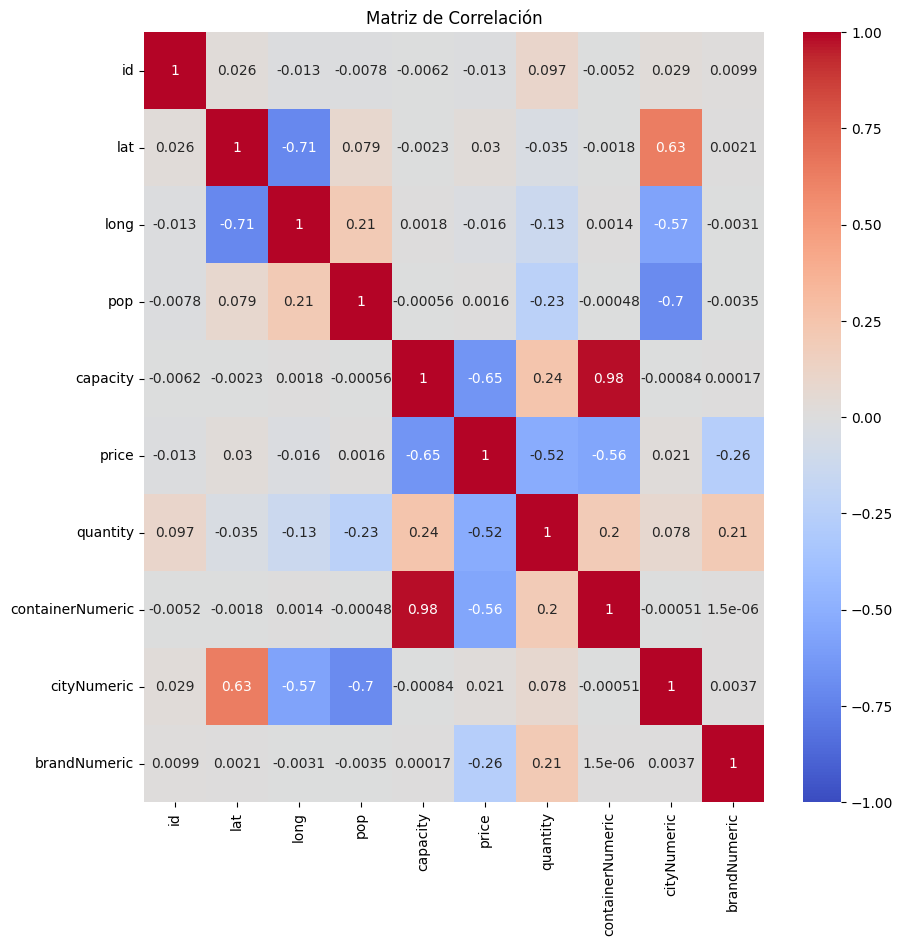

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

La variable dependiente es containerNumeric, y la correlación sería con cityNumeric,brandNumeric,quantity; ya que los valores más altos le darían ruido al modelo, mientras se puede utilizar los valores menores para ver su comportamiento

##6. Divida el conjunto de datos así, 80% entrenamiento y 20% pruebas.

In [49]:
df_cols = df[["cityNumeric", "brandNumeric", "quantity","containerNumeric"]]
df_cols

,cityNumeric,brandNumeric,quantity,containerNumeric
0,0,0,7056,0
1,0,0,12490,1
2,0,1,26640,2
3,0,2,41892,2
4,0,2,22923,0
...,...,...,...,...
1075,0,0,13760,0
1076,0,2,16309,0
1077,2,0,24378,1
1078,3,1,20691,0


array([[<Axes: title={'center': 'cityNumeric'}>,
        <Axes: title={'center': 'brandNumeric'}>],
       [<Axes: title={'center': 'quantity'}>,
        <Axes: title={'center': 'containerNumeric'}>]], dtype=object)

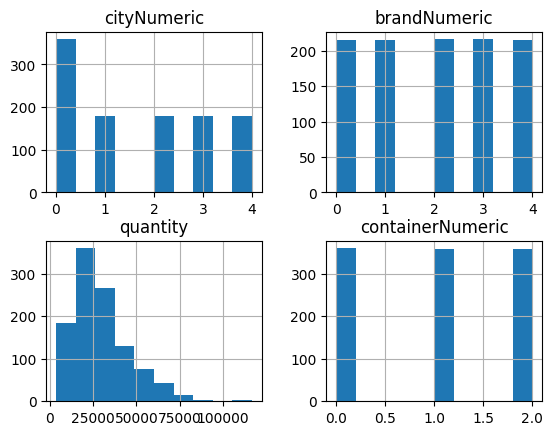

In [50]:
df_cols.hist()

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_cols, test_size=0.2, random_state=42)

X_train = df_train[["cityNumeric", "brandNumeric", "quantity"]]
y_train = df_train[["containerNumeric"]]

x_test = df_test[["cityNumeric", "brandNumeric", "quantity"]]
y_test = df_test[["containerNumeric"]]

##7. En caso de ser necesario transforme los atributos categóricos a numéricos. Explique la elección del método utilizado para su conjunto de datos.

Se realizó anteriormente con el método factorize.

Factorizar es una forma simple y efectiva de convertir características categóricas en valores numéricos. Asigna un número único a cada categoría y no requiere la creación de diccionarios de mapeo manualmente.



##8. Para el conjunto de datos de entrenamiento realice el escalado del conjunto (normalización o estandarización) realice la justificación del método seleccionado para su conjunto de datos.

La estandarización es particularmente útil cuando las características tienen diferentes escalas y variancias. En este conjunto de datos, tengo características como "cityNumeric," "brandNumeric" y "quantity" que podrían tener diferentes magnitudes. Al aplicar la estandarización, todas las características se ajustarán a la misma escala, lo que puede ayudar a los algoritmos de aprendizaje automático a converger más rápido y a lidiar mejor con la variabilidad en las características.



In [52]:
# Aplicar estandarización (Z-score)
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_standard = std_scaler.fit_transform(df_train)
test_standard = std_scaler.fit_transform(df_test)
train_standard

array([[ 1.56752989, -0.68920455, -0.52191029,  1.19881752],
       [-0.446863  , -1.39312521, -0.2176772 , -0.01981517],
       [-0.446863  ,  0.71863677,  4.28453798,  1.19881752],
       ...,
       [ 0.2246013 , -0.68920455, -0.75616977, -0.01981517],
       [-1.11832729,  0.71863677, -0.43529699, -0.01981517],
       [-1.11832729, -1.39312521, -1.09343389, -1.23844785]])

##9. Realice la implementación de la RBNN en su conjunto de datos, Defina la taza de aprendizaje y el error en 0.01 y 1e-7 respec�vamente, jus�fique la técnica u�lizada para definir el número de centroides

La técnica del codo es una forma de determinar el número adecuado de clusters en un conjunto de datos para el algoritmo K-Means. La idea es que, a medida que aumentas el número de clusters, la inercia disminuye (inercia es una medida de cómo los puntos están cercanos a su centroide respectivo). Sin embargo, llega un punto en el que agregar más clusters no mejora significativamente la reducción de inercia y, en cambio, puede llevar a un sobreajuste (overfitting) de los datos

Lo que puede ser útil para tener una idea de cómo los datos se agrupan naturalmente en el conjunto

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

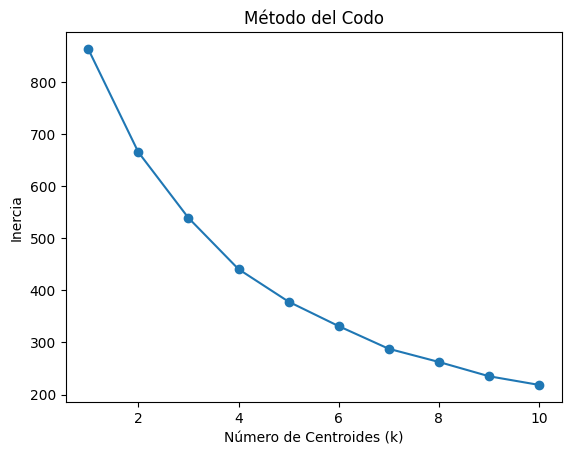

In [53]:
from sklearn.cluster import KMeans

inertia_values = []
variance = []

for k in range(1, 11):  # Prueba para k desde 1 hasta 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(test_standard)
    inertia_values.append(kmeans.inertia_)
    mean_inertia = np.mean(inertia_values)
    centroids = kmeans.cluster_centers_
    # Calcula las diferencias al cuadrado entre cada valor y la media
    squared_diffs = [(value - mean_inertia)**2 for value in inertia_values]
    # Calcula la varianza como la media de las diferencias al cuadrado
    variance.append(np.mean(squared_diffs))

plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Número de Centroides (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

Las iteraciones se realizaron y probaron varia cantidad de veces para encontrar el mejor punto de interacción en la linea. En este caso la inclinación del codo se encontró más en el 5.

In [54]:
centroids

array([[ 0.25224793, -0.12675659,  1.76058688,  0.53011489],
       [-0.92444709,  1.04049596, -0.64131569, -0.38559066],
       [ 1.35059874, -0.71212009, -0.07103455,  0.55599233],
       [-0.83384792, -0.94095908, -0.85230428, -1.16342008],
       [-0.97018435,  0.66091383, -0.3248331 ,  1.3495673 ],
       [-0.50449586,  0.50337975,  1.15947272, -0.50785816],
       [-0.72701234, -1.13904013, -0.34896687,  0.53892621],
       [ 1.06720279, -0.78839975, -0.57332122, -1.16342008],
       [ 1.115712  ,  1.19232881, -0.52933831, -1.16342008],
       [ 0.99826864,  1.11859181,  0.17185755,  0.82051732]])

In [55]:
variance


[0.0,
 9825.46990429567,
 17843.713773737447,
 24991.07013020303,
 29924.339249819364,
 33361.48114837163,
 36174.85070864376,
 37876.774418426416,
 39175.87129112171,
 39878.621276143895]

In [56]:
import numpy as np

#Calcula una medida de similitud (o más precisamente,
#una medida de distancia al cuadrado normalizada) entre el
#vector de entrada x y el centro c utilizando la función de base radial Gaussiana.
#El valor devuelto por esta función será más grande cuando la entrada esté cerca del
#centro y disminuirá a medida que la entrada se aleje del centro.
#Esta es la esencia de cómo funcionan las neuronas con bases radiales en una red neuronal RBF.
def rbf_activation(x, c, var):
    return np.exp(-np.sum((x - c)**2) / (2 * var))

#Realiza la iteración por cada centroide que tengo y aplica el método gaussiana
# especificando la varianza y el centroide
def rbf_neural_network(input_data):
    num_centroids = centroids.shape[0]
    output = np.zeros(num_centroids)

    for i in range(num_centroids):
        output[i] = rbf_activation(input_data, centroids[i], variance[i])

    return output


# Obtener las salidas de la red neuronal RBF
output = rbf_neural_network(train_standard)

print("Salidas de la red neuronal RBF:", output)


Salidas de la red neuronal RBF: [0.         0.7522603  0.85186433 0.87637258 0.90024301 0.92418159
 0.92845102 0.91888645 0.91282582 0.92771267]


<ipython-input-56-64bc152d2844>:5: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-np.sum((x - c)**2) / (2 * var))


In [57]:
outputs = []

#Realiza el llamado del método para la función de activación por cada fila que tengo de los datos estandarizados
for data_point in train_standard:
    output = rbf_neural_network(data_point)
    outputs.append(output)

print("Salidas de la red neuronal RBF para todos los ejemplos:")
for output in outputs:
    print(output)


<ipython-input-56-64bc152d2844>:5: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-np.sum((x - c)**2) / (2 * var))


Salidas de la red neuronal RBF para todos los ejemplos:
[0.         0.99940344 0.99998139 0.99976956 0.99986092 0.99982833
 0.999918   0.99992287 0.999881   0.99994713]
[0.         0.99967112 0.99988659 0.99995869 0.99989341 0.99991405
 0.99999347 0.99994598 0.9998656  0.99988397]
[0.         0.99862157 0.99930918 0.99930257 0.99964005 0.99980925
 0.99964852 0.99955467 0.99959907 0.99975797]
[0.         0.99963667 0.9998493  0.99982386 0.99978045 0.99989394
 0.99983587 0.99996583 0.99999393 0.99993769]
[0.         0.99962052 0.99984314 0.99967581 0.9999181  0.99990923
 0.999855   0.99984392 0.99991183 0.99999484]
[0.         0.9996388  0.99977525 0.99977051 0.99977021 0.99987295
 0.99979251 0.99993205 0.99999664 0.9999357 ]
[0.         0.99989111 0.99982675 0.99982178 0.9999322  0.99995877
 0.99988977 0.99990297 0.99996755 0.99998241]
[0.         0.99960442 0.99996384 0.99978337 0.99992779 0.99991247
 0.99993324 0.99990722 0.99990156 0.99998257]
[0.         0.99951152 0.9999717  0.9999

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

clf = MLPClassifier(hidden_layer_sizes=(1,), max_iter=100, random_state=53, learning_rate_init=0.01, alpha=0.0000001)

clf.fit(outputs, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=1e-07, hidden_layer_sizes=(1,), learning_rate_init=0.01,
              max_iter=100, random_state=53)

##10. Valide utilizando el método de validación cruzada por lo menos 3 topologías de la red e imprima los resultados para cada topología y justifique la elección de la topología implementada.

Se ha seleccionado tres topologías con diferentes niveles de complejidad para evaluar cómo se comportan los datos. Al realizar la validación cruzada con estas topologías, se podrá observar cómo se desempeñan en diferentes divisiones del conjunto de entrenamiento y tener una idea de cuál podría ser la mejor opción para el problema.

Al imprimir las precisiones promedio de cada red después de la validación cruzada, se podría comparar sus rendimientos y elegir la topología que parece ser la más adecuada para el conjunto de datos.

In [59]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define diferentes tipologías de redes
networks = [
    MLPClassifier(hidden_layer_sizes=(5,), max_iter=100),
    MLPClassifier(hidden_layer_sizes=(10,20), max_iter=100),
    MLPClassifier(hidden_layer_sizes=(50,30), max_iter=100),
]

# Realiza la validación cruzada para cada red y obtén las puntuaciones
for idx, network in enumerate(networks):
    scores = cross_val_score(network, X_train, y_train, cv=5)  # Ajusta el número de divisiones (cv) s
    print(f"Red {idx+1}: Precisión promedio: {np.mean(scores):.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

Red 1: Precisión promedio: 0.3298


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

Red 2: Precisión promedio: 0.3310


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed w

Red 3: Precisión promedio: 0.3368


la Red 1 con una sola capa oculta de 5 nodos parece ser la mejor opción de las tres.

##11. Realice la validación con su conjunto de datos de pruebas, imprima la matriz de confusión si su ejercicio es de clasificación y explique los resultados. Si su ejercicio es de aproximación de funciones imprima el error cuadrá�co medio de las predicciones y explique su respuesta.

Precisión: 0.2824074074074074


<ipython-input-56-64bc152d2844>:5: RuntimeWarning: divide by zero encountered in double_scalars
  return np.exp(-np.sum((x - c)**2) / (2 * var))


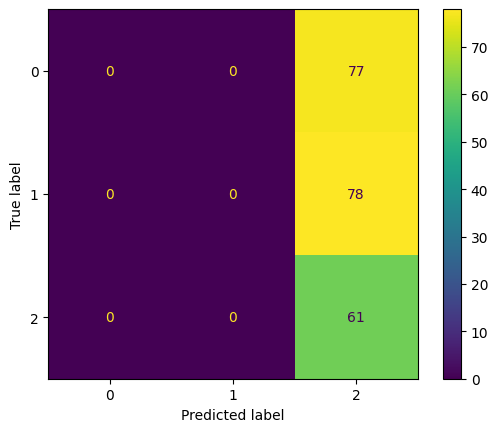

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

x_test_list = []

##Aplica para los datos de prueba la función de la red neuronal, con base a los
#datos que se entrenaron
for data_point in test_standard:
    output = rbf_neural_network(data_point)
    x_test_list.append(output)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(x_test_list)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

matriz_confusion = confusion_matrix(y_test, y_pred)

# Crear la visualización de la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matriz_confusion)

# Graficar la matriz de confusión
cm_display.plot()
plt.show()

In [61]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
matriz_confusion

array([[ 0,  0, 77],
       [ 0,  0, 78],
       [ 0,  0, 61]])

Esta matriz de confusión sugiere que el modelo no ha logrado predecir correctamente ninguna de las clases para las muestras proporcionadas. Puede haber varios motivos para esto, como problemas en la clasificación o que este tipo de modelo no se aplicaría. Sería importante analizar más a fondo el proceso de entrenamiento y evaluación del modelo para comprender por qué se está obteniendo esta matriz de confusión y cómo se puede mejorar el rendimiento del modelo.


